Using TensorFlow backend.


训练样例: (50000, 32, 32, 3) (50000, 1) , 测试样例: (10000, 32, 32, 3) (10000, 1)
取数据耗时:  1.0284512042999268 s ...
开始建模CNN ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_______________________

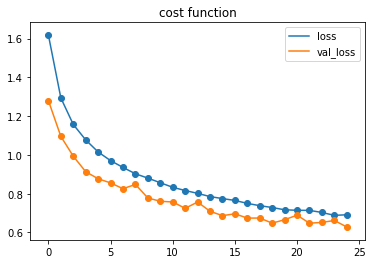

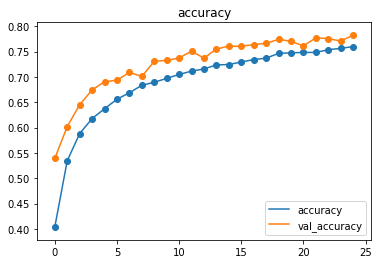

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr  8 14:28:08 2017

@author: cyrano
"""

import time

from keras.datasets import cifar10
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.utils import np_utils, plot_model
#from keras.utils.visualize_util import plot

import matplotlib.pyplot as plt


# 开始下载数据集
t0 = time.time()  # 打开深度学习计时器

# CIFAR10 图片数据集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()  # 32×32

X_train = X_train.astype('float32')  # uint8-->float32
X_test = X_test.astype('float32')
X_train /= 255  # 归一化到0~1区间
X_test /= 255

print('训练样例:', X_train.shape, Y_train.shape,
      ', 测试样例:', X_test.shape, Y_test.shape)


nb_classes = 10  # label为0~9共10个类别
# Convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
print("取数据耗时: ",(time.time() - t0), "s ..." )


################# 1. 建立CNN模型
print("开始建模CNN ...")
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=X_train.shape[1:], padding='valid')) # C1 卷积层
model.add(Activation('relu'))

model.add(Convolution2D(32, (3, 3)))  # C2 卷积层
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # S3 池化
model.add(Dropout(0.25))  # 


model.add(Convolution2D(64, (3, 3), padding='valid')) # C4
model.add(Activation('relu'))


model.add(Convolution2D(64, (3, 3))) # C5
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))  # S6
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))  # F7 全连接层, 512个神经元
model.add(Activation('relu'))  # 
model.add(Dropout(0.5))


model.add(Dense(nb_classes))  # label为0~9共10个类别
model.add(Activation('softmax'))  # softmax 分类器
model.summary() # 模型小节
print("建模CNN完成 ...")


################# 2. 训练CNN模型
batch = 64
epochs = 30

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-8)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#from keras.utils import plot_model
plot_model(model, to_file='Homework3-cifar10-keras.png', show_shapes=True)  # 画模型图

result = model.fit(X_train, Y_train, batch, epochs, shuffle=True, validation_data=(X_test, Y_test))

#Y_pred = model.predict_proba(X_test, verbose=0)  # Keras预测概率Y_pred
#print(Y_pred[:3, ])  # 取前三张图片的十类预测概率

score = model.evaluate(X_test, Y_test, verbose=0) # 评估测试集loss损失和精度acc
print("测试集 score(val_loss): ", score[0])  # loss损失
print("测试集 accuracy: ", score[1]) # 精度acc
print("耗时: ",(time.time() - t0), "s ...")

# plot the result

plt.figure
plt.title("cost function")
plt.plot(result.epoch,result.history['loss'],label="loss")
plt.plot(result.epoch,result.history['val_loss'],label="val_loss")
plt.scatter(result.epoch,result.history['loss'])
plt.scatter(result.epoch,result.history['val_loss'])
plt.legend(loc='upper right')
plt.show()


plt.figure
plt.title("accuracy")
plt.plot(result.epoch,result.history['acc'],label="accuracy")
plt.plot(result.epoch,result.history['val_acc'],label="val_accuracy")
plt.scatter(result.epoch,result.history['acc'])
plt.scatter(result.epoch,result.history['val_acc'])
plt.legend(loc='lower right')
plt.show()